In [7]:
#Gradient Descent

import csv,numpy
class Grad_Desc:
    def __init__(self):
        self.x=0
        self.y=0
    '''def read_data(self):
        self.x=list()
        self.y=list()
        with open('D:\jupyter ntbks\datasets\grad_desc_imp_dataset.csv','r') as csvFile:
            reader=csv.reader(csvFile)
            for row in reader:
                self.x.append(row[0])
                self.y.append(row[1])
            print(self.x)
            print(self.y)'''
    def read_data(self):
        points=numpy.genfromtxt('D:\jupyter ntbks\datasets\grad_desc_imp_dataset.csv',delimiter=',')
        print(points)
Grad_Desc().read_data()


#TODO Implement
            

[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57.50444762

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


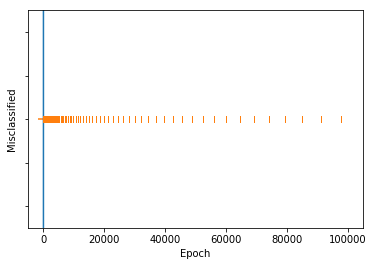

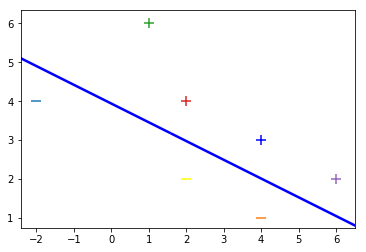

In [2]:
#SVM

import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])



#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

w = svm_sgd_plot(X,y)
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')
